In [ ]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt


# Get data from yahoo finance
sd = dt.datetime(2001,1,1)
ed = dt.datetime(2023,3,2)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
#nasdaq stocks above 200 day moving average percentage

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')


In [ ]:
def sliding_test(ticker: ab.StockData, stg:ab.Strategy, window: int, sd: dt.datetime, ed: dt.datetime, run_strategy: bool = True):
    delta = ed - sd
    result = []
    for i in range(0, delta.days + 1, 30):
        sd_5y = sd + dt.timedelta(days=i)
        ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=window)
        
        if run_strategy:
            stg.run_strategy(ticker, sd_5y, ed_5y)
        bt = None
        bt = ab.BackTest(sd_5y, ed_5y,1)
        bt.run_backtest(stg, ticker)
        print(sd_5y,'-', ed_5y, 'balance:', bt.balance['Total'].iloc[-1], flush=True)
        result.append([sd_5y,bt.balance['Total'].iloc[-1]])
        
    return result



In [ ]:
test_sd = dt.datetime(2001,1,1)
test_ed = dt.datetime(2023,3,2)
window = 365*5

In [ ]:
buy_and_hold = ab.BuyAndHold()
bh_result = sliding_test(qqq,buy_and_hold,window, test_sd,test_ed,True)

In [30]:
naa200R_stg = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30, signal_ma_window = 40)
naa200r_rst_15_30_ma40 = sliding_test(qqq,naa200R_stg,window, test_sd,test_ed, True)

2001-01-01 00:00:00 - 2005-12-31 00:00:00 balance: 0.8217950830136094
2001-01-31 00:00:00 - 2006-01-30 00:00:00 balance: 0.8579939013783682
2001-03-02 00:00:00 - 2006-03-01 00:00:00 balance: 0.8472156189612926
2001-04-01 00:00:00 - 2006-03-31 00:00:00 balance: 0.8527064640352705
2001-05-01 00:00:00 - 2006-04-30 00:00:00 balance: 0.8510795124975056
2001-05-31 00:00:00 - 2006-05-30 00:00:00 balance: 0.7857995948024117
2001-06-30 00:00:00 - 2006-06-29 00:00:00 balance: 0.792307245798833
2001-07-30 00:00:00 - 2006-07-29 00:00:00 balance: 0.7327215033312782
2001-08-29 00:00:00 - 2006-08-28 00:00:00 balance: 0.7331012588488206
2001-09-28 00:00:00 - 2006-09-27 00:00:00 balance: 0.7731645605625687
2001-10-28 00:00:00 - 2006-10-27 00:00:00 balance: 0.8014556585253757
2001-11-27 00:00:00 - 2006-11-26 00:00:00 balance: 0.8477848176321368
2001-12-27 00:00:00 - 2006-12-26 00:00:00 balance: 0.8185442946599939
2002-01-26 00:00:00 - 2007-01-25 00:00:00 balance: 0.8779498072048426
2002-02-25 00:00:00 -

In [ ]:
threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
naa200r_result = sliding_test(qqq,threshold_strategy,window, test_sd,test_ed, True)

In [ ]:
ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
ma_threshold_result = sliding_test(qqq,ma_threshold,window, test_sd,test_ed, True)


In [ ]:
ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
ma_threshold_result2 = sliding_test(qqq,ma_threshold2,window, test_sd,test_ed, True)


In [ ]:
macross_strategy = ab.MACross(50, 200)
ma_threshold_result2 = sliding_test(qqq,macross_strategy,window, test_sd,test_ed, True)

In [ ]:

WeeklyMAThreshold = ab.WeeklyMAThreshold(ma_window =40,buy_threshold=1,sell_threshold=1)
WeeklyMAThreshold_result = sliding_test(qqq,WeeklyMAThreshold,window, test_sd,test_ed, True)

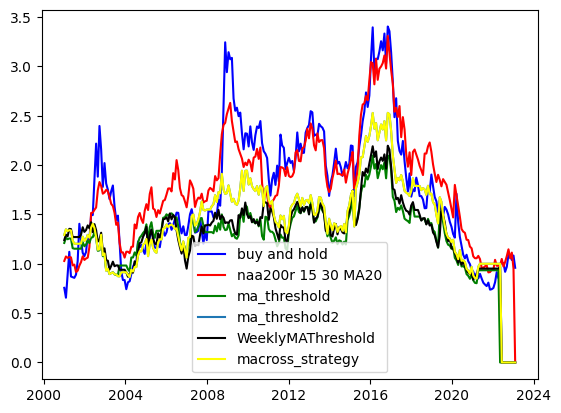

In [28]:
plt.plot([x[0] for x in bh_result], [x[1] for x in bh_result], label='buy and hold', color='blue')
plt.plot([x[0] for x in naa200r_result], [x[1] for x in naa200r_result], label='naa200r 15 30 MA20', color='red')
plt.plot([x[0] for x in naa200r_rst_15_30_ma40], [x[1] for x in naa200r_rst_15_30_ma40], label='naa200r 15 30 MA40', color='orange')
plt.plot([x[0] for x in ma_threshold_result], [x[1] for x in ma_threshold_result], label='ma_threshold', color='green')
plt.plot([x[0] for x in ma_threshold_result2], [x[1] for x in ma_threshold_result2], label='ma_threshold2')
plt.plot([x[0] for x in WeeklyMAThreshold_result], [x[1] for x in WeeklyMAThreshold_result], label='WeeklyMAThreshold', color='black')
plt.plot([x[0] for x in ma_threshold_result2], [x[1] for x in ma_threshold_result2], label='macross_strategy', color='yellow')
plt.legend()

In [29]:
import numpy as np
print('bh avg:', np.mean([x[1] for x in bh_result]))
print('naa200r avg:', np.mean([x[1] for x in naa200r_result]))

print('ma_threshold avg:', np.mean([x[1] for x in ma_threshold_result]))
print('ma_threshold2 avg:', np.mean([x[1] for x in ma_threshold_result2]))
print('WeeklyMAThreshold avg:', np.mean([x[1] for x in WeeklyMAThreshold_result]))

print('bh std:', np.std([x[1] for x in bh_result]))
print('naa200r std:', np.std([x[1] for x in naa200r_result]))

print('ma_threshold avg:', np.std([x[1] for x in ma_threshold_result]))
print('ma_threshold2 avg:', np.std([x[1] for x in ma_threshold_result2]))
print('WeeklyMAThreshold avg:', np.std([x[1] for x in WeeklyMAThreshold_result]))




bh avg: 1.7346675743935456
naa200r avg: 1.7899933726938277
ma_threshold avg: 1.2822455470391654
ma_threshold2 avg: 1.4204661699207013
WeeklyMAThreshold avg: 1.319760596505435
bh std: 0.6435775805246244
naa200r std: 0.5340258196274054
ma_threshold avg: 0.36050675186952497
ma_threshold2 avg: 0.45722610434942074
WeeklyMAThreshold avg: 0.37048166101616653
